---
title: "How to find peaks and dips in a line plot using Python Matplotlib"
author: "Yurkov Sergey"
date: "2024-04-22"
categories: [python, matplotlib]
format: html
# draft: true
---


In this small tutorial we will use the U.S. COVID-19 inoculation data from one of my academic papers to find the most prominent peaks and dips in daily vaccinations and visualize them with Matplotlib.


### Step 1: Importing the dependencies

We will use Pandas to read and manipulate the `.csv` file, Matplotlib for plotting the data, Numpy, and finally `argrelextrema` function from the `signal` package to find the "extreme" values in the data.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import signal

### Step 2: Import and filter the data by location; we will use a CSV file from Our World in Data.


In [20]:
df_raw = pd.read_csv(
    "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv",
    usecols=["location", "date", "daily_vaccinations"],
    parse_dates=["date"],
)

df = df_raw[df_raw["location"] == "United States"][["date", "daily_vaccinations"]]

df.reset_index(inplace=True, drop=True)

df

,date,daily_vaccinations
0,2020-12-13,NaN
1,2020-12-14,4848.0
2,2020-12-15,26366.0
3,2020-12-16,70961.0
4,2020-12-17,122030.0
...,...,...
873,2023-05-05,79390.0
874,2023-05-06,79498.0
875,2023-05-07,79119.0
876,2023-05-08,74120.0


### Step 3: Find peaks and dips


In [22]:
data_x = df["date"].values
data_y = df["daily_vaccinations"].values

# Find peaks (np.greater)
peak_indexes = signal.argrelextrema(data_y, np.greater)
peak_indexes = peak_indexes[0]

# Find valleys (np.less)
valley_indexes = signal.argrelextrema(data_y, np.less)
valley_indexes = valley_indexes[0]

### Step 4: Plot the data


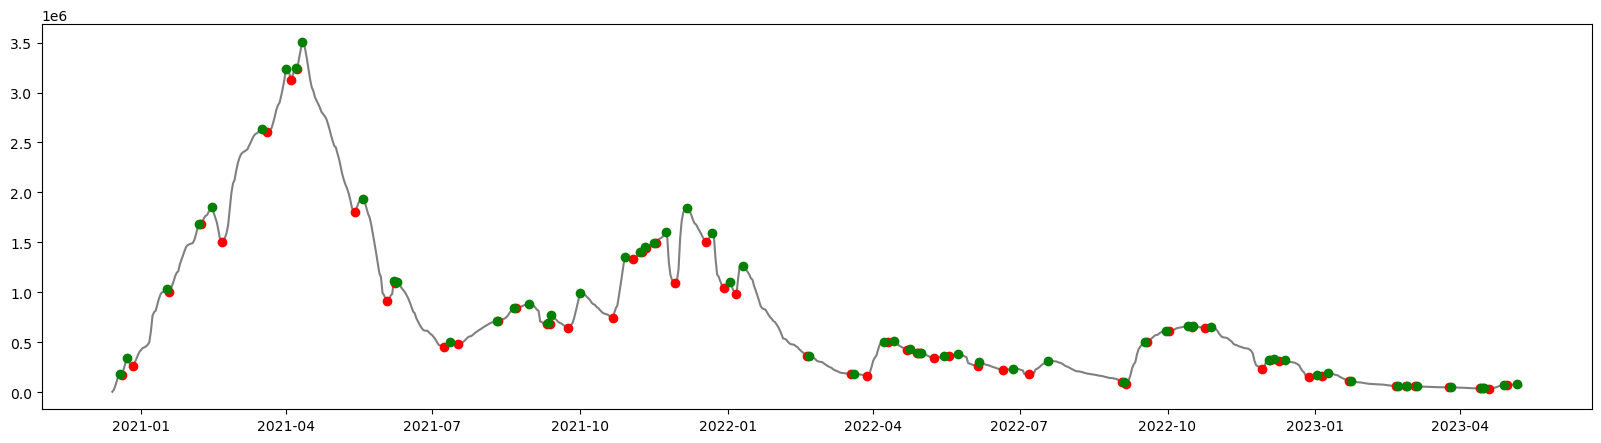

In [24]:
plt.figure(figsize=(20, 5))
plt.plot(data_x, data_y, color="grey")
plt.plot(
    data_x[valley_indexes],
    data_y[valley_indexes],
    "o",
    label="dip",
    color="r",
)
plt.plot(
    data_x[peak_indexes],
    data_y[peak_indexes],
    "o",
    label="peak",
    color="g",
)
plt.show()


### Exploring the data


We can look at peak and dip dates and the corresponding values:


In [25]:
list(zip(data_x[peak_indexes], data_y[peak_indexes]))

[(numpy.datetime64('2020-12-19T00:00:00.000000000'), 182230.0),
 (numpy.datetime64('2020-12-23T00:00:00.000000000'), 343482.0),
 (numpy.datetime64('2021-01-17T00:00:00.000000000'), 1032650.0),
 (numpy.datetime64('2021-02-06T00:00:00.000000000'), 1683043.0),
 (numpy.datetime64('2021-02-14T00:00:00.000000000'), 1854830.0),
 (numpy.datetime64('2021-03-17T00:00:00.000000000'), 2637533.0),
 (numpy.datetime64('2021-04-01T00:00:00.000000000'), 3240378.0),
 (numpy.datetime64('2021-04-07T00:00:00.000000000'), 3248620.0),
 (numpy.datetime64('2021-04-11T00:00:00.000000000'), 3508126.0),
 (numpy.datetime64('2021-05-19T00:00:00.000000000'), 1937892.0),
 (numpy.datetime64('2021-06-07T00:00:00.000000000'), 1110118.0),
 (numpy.datetime64('2021-06-09T00:00:00.000000000'), 1101934.0),
 (numpy.datetime64('2021-07-12T00:00:00.000000000'), 501021.0),
 (numpy.datetime64('2021-08-10T00:00:00.000000000'), 716144.0),
 (numpy.datetime64('2021-08-21T00:00:00.000000000'), 844978.0),
 (numpy.datetime64('2021-08-30

In [26]:
list(zip(data_x[valley_indexes], data_y[valley_indexes]))

[(numpy.datetime64('2020-12-20T00:00:00.000000000'), 171512.0),
 (numpy.datetime64('2020-12-27T00:00:00.000000000'), 266832.0),
 (numpy.datetime64('2021-01-18T00:00:00.000000000'), 1005887.0),
 (numpy.datetime64('2021-02-07T00:00:00.000000000'), 1680143.0),
 (numpy.datetime64('2021-02-20T00:00:00.000000000'), 1505355.0),
 (numpy.datetime64('2021-03-20T00:00:00.000000000'), 2603838.0),
 (numpy.datetime64('2021-04-04T00:00:00.000000000'), 3128761.0),
 (numpy.datetime64('2021-04-08T00:00:00.000000000'), 3237451.0),
 (numpy.datetime64('2021-05-14T00:00:00.000000000'), 1801903.0),
 (numpy.datetime64('2021-06-03T00:00:00.000000000'), 911022.0),
 (numpy.datetime64('2021-06-08T00:00:00.000000000'), 1095082.0),
 (numpy.datetime64('2021-07-08T00:00:00.000000000'), 451686.0),
 (numpy.datetime64('2021-07-17T00:00:00.000000000'), 482398.0),
 (numpy.datetime64('2021-08-11T00:00:00.000000000'), 715034.0),
 (numpy.datetime64('2021-08-22T00:00:00.000000000'), 843679.0),
 (numpy.datetime64('2021-09-10T0

However, these data don't give us much useful information. Instead, we can look at the longest streaks of consecutive peak and dip days. In order to do that, we need to refer back to the previous figure again. Because the `signal.argrelextrema` function doesn't take into account the beginning and end of data, our first working point is a peak 6 days from the start of vaccination on December 13, 2020.


![](output1.png)


In [27]:
data_x[0]

numpy.datetime64('2020-12-13T00:00:00.000000000')

In [28]:
data_x[peak_indexes][0]

numpy.datetime64('2020-12-19T00:00:00.000000000')

Because a dip streak is basically the difference between the last peak and the next dip, in order to find the period between the two, we can subtract the date of the peak from the date of the following dip.

First, we `zip` these two arrays together to be able to iterate through them at the same time. We use these two values to subtract one from another. Because the resulting dtype is Numpy's `timedelta` it is represented in nanoseconds. In order to get the day value we need to divide it by `86400000000000` which is the number of nanoseconds in 24 hours. Then we store the resulting deltas in a list; we find the max value in the list as well as its index. We can use this index value to refer back to the value pair of the period of interest -- in this case it is the period of 46 days between June 19 and September 3, 2022.


In [29]:
# Dips
dip_strikes = list(
    zip(
        data_x[peak_indexes],
        data_x[valley_indexes],
    )
)

dip_strike_days = []
for strike in dip_strikes:
    dip_strike_days.append(int(strike[1] - strike[0]) // 86400000000000)

max_days = max(dip_strike_days)

index_max_dip = dip_strike_days.index(max_days)

print(dip_strikes[index_max_dip], max_days)

(numpy.datetime64('2022-07-19T00:00:00.000000000'), numpy.datetime64('2022-09-03T00:00:00.000000000')) 46


We now repeat the same procedure for the peaks. The only difference is that we now need the dip-peak values instead of the peak-dip values in the previous step. We can simply remove the first peak value and we will end up with matching dip-peak value pairs for the rest of the analysis.


In [30]:
# Peak
peak_strikes = list(zip(data_x[valley_indexes], data_x[peak_indexes][1:]))

peak_strikes_days = []
for strike in peak_strikes:
    peak_strikes_days.append(int(strike[1] - strike[0]) // 86400000000000)

max_days = max(peak_strikes_days)

index_max_peak = peak_strikes_days.index(max_days)

print(peak_strikes[index_max_peak], max_days)

(numpy.datetime64('2021-02-20T00:00:00.000000000'), numpy.datetime64('2021-03-17T00:00:00.000000000')) 25


We end up with the value of 25 days in the period between February 20 and March 17, 2021.

Now we visualize these periods by modifying the previous plot.


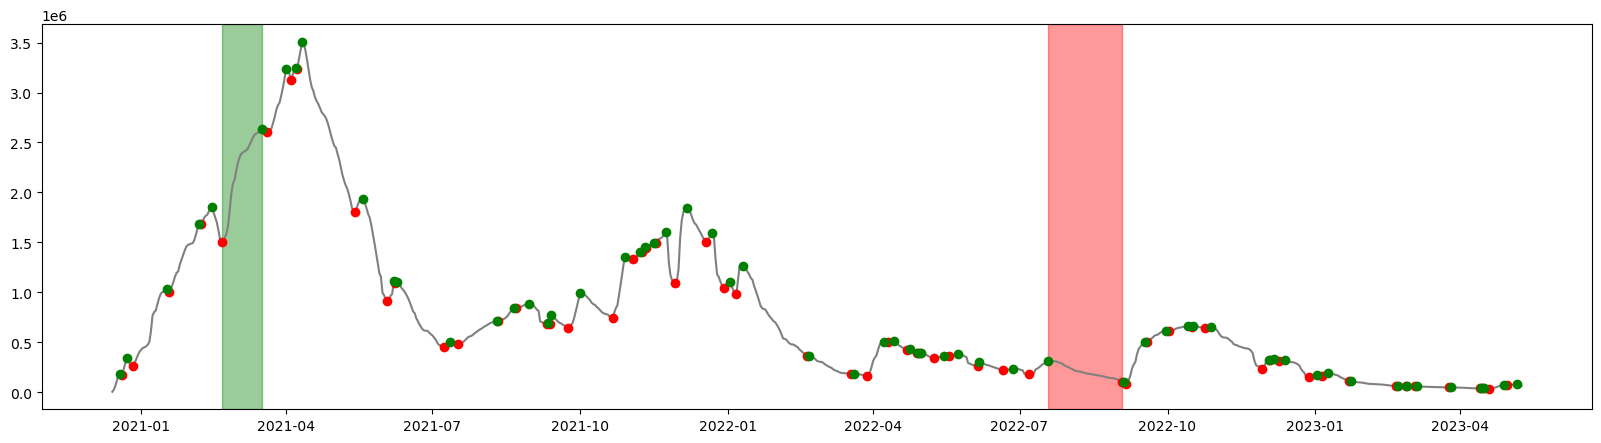

In [31]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(data_x, data_y, color="grey")  # line plot for the original data
ax.plot(
    data_x[valley_indexes],
    data_y[valley_indexes],
    "o",
    label="dip",
    color="r",
)
ax.plot(
    data_x[peak_indexes],
    data_y[peak_indexes],
    "o",
    label="peak",
    color="g",
)
ax.axvspan(
    peak_strikes[index_max_peak][0],
    peak_strikes[index_max_peak][1],
    color="g",
    alpha=0.4,
)
ax.axvspan(
    dip_strikes[index_max_dip][0],
    dip_strikes[index_max_dip][1],
    color="r",
    alpha=0.4,
)

Without additional context (for example political or other events happening during these periods) this also doesn't give us much useful information. However, one thing is clear -- the two dip periods marked in blue below, despite being visually prominent, are not the longest dipping periods -- the one highlighted in red is.


![](output.png)
